In [27]:
import pandas as pd
import sklearn.preprocessing as prep
import sklearn.metrics as met
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [28]:
df = pd.read_csv('car.csv')
features = df.columns[1:]

x_orig = df[features]
y = df['class']

#normalizacija
x = pd.DataFrame(prep.MinMaxScaler().fit_transform(x_orig), columns = features)


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y)

In [49]:
#params za knn
params = [{
    'n_neighbors' : [3,20,2],
    'p' : [1,2],
    'weights' :['uniform', 'distance']
}]


clf.fit(x_train, y_train)
print(clf.best_params_)

y_pred = clf.predict(x_test)
print(met.accuracy_score(y_test, y_pred))
print(met.confusion_matrix(y_test, y_pred))
print(met.classification_report(y_test, y_pred))


y_pre = clf.predict(x_train)
print(met.accuracy_score(y_train, y_pre))
print(met.confusion_matrix(y_train, y_pre))
print(met.classification_report(y_train, y_pre))

{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
0.7572815533980582
[[20  4  0  0]
 [ 0 40  5  0]
 [ 0 11 18  0]
 [ 0  0  5  0]]
              precision    recall  f1-score   support

           A       1.00      0.83      0.91        24
           B       0.73      0.89      0.80        45
           C       0.64      0.62      0.63        29
           D       0.00      0.00      0.00         5

    accuracy                           0.76       103
   macro avg       0.59      0.59      0.59       103
weighted avg       0.73      0.76      0.74       103

1.0
[[ 57   0   0   0]
 [  0 104   0   0]
 [  0   0  66   0]
 [  0   0   0  12]]
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        57
           B       1.00      1.00      1.00       104
           C       1.00      1.00      1.00        66
           D       1.00      1.00      1.00        12

    accuracy                           1.00       239
   macro avg       1.00    

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
#pca
pca = PCA()
pca.fit(x)

x_pca = pd.DataFrame(pca.transform(x))
x_pca.columns = ['pca%d'%i for i in range(1, pca.n_components_+1)]


In [51]:
for i, ev in zip(range(1, pca.n_components_+1), pca.explained_variance_ratio_):
    print("pca%d %.10f"%(i,ev))

pca1 0.8095655824
pca2 0.1465791004
pca3 0.0266284558
pca4 0.0105570363
pca5 0.0066698251


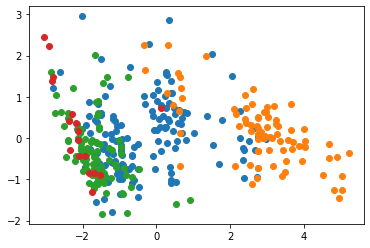

In [70]:
x_pca['predicted'] = y
classes =  y.unique()

for i, clas in zip(range(0, len(classes)) , classes):
    cls_smpl = x_pca.iloc[y[y == clas].index]
    plt.scatter(cls_smpl['pca1'], cls_smpl['pca2'])
    
plt.show()

Prvih 5 instanci
  class  cylinders  displacement  horsepower  weight  acceleration
0     B          8           307         130    3504          12.0
1     A          8           350         165    3693          11.5
2     B          8           318         150    3436          11.0
3     A          8           304         150    3433          12.0
4     A          8           302         140    3449          10.5

Opis podataka
        cylinders  displacement  horsepower       weight  acceleration
count  342.000000    342.000000  342.000000   342.000000    342.000000
mean     5.429825    191.008772  102.745614  2970.365497     15.643860
std      1.698555    102.326758   36.704050   830.014100      2.684878
min      3.000000     68.000000   46.000000  1649.000000      8.500000
25%      4.000000    105.000000   75.000000  2223.750000     13.925000
50%      4.000000    146.000000   92.000000  2811.000000     15.500000
75%      8.000000    260.000000  121.500000  3611.000000     17.17500

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


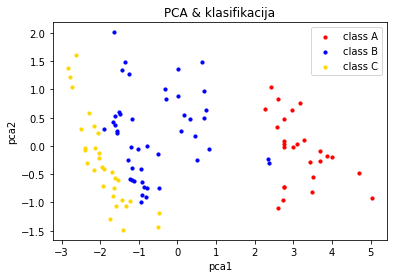

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import sklearn.metrics as met

#funkcija za klasifikaciju skupa
def classification(message, x_arg, y_arg):

    print(message, '\n')

    # podela na trening i test skup
    x_train, x_test, y_train, y_test = train_test_split(x_arg, y_arg, test_size=0.3, stratify=y)

    # vrednosti parametara algoritma KNN za unakrsnu validacuju
    parameters = [{'n_neighbors': range(3, 20, 2),
                   'p': [1, 2],
                   'weights': ['uniform', 'distance']
                   }]

    #primena unakrsne validacije
    clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=10)
    clf.fit(x_train, y_train)

    print("Najbolji parametri:")
    print(clf.best_params_)
    print()

    print("Izvestaj za trening skup:")
    y_pred =clf.predict(x_train)
    print('Preciznost: ', met.accuracy_score(y_train, y_pred))
    print()

    print("Matrica konfuzije",
          pd.DataFrame(met.confusion_matrix(y_train, y_pred),
                       index=clf.classes_,
                       columns=clf.classes_),
          sep="\n")
    print()

    print("Izvestaj za test skup:")
    y_pred =clf.predict(x_test)
    print('Preciznost: ', met.accuracy_score(y_test, y_pred))
    print()

    print("Matrica konfuzije",
          pd.DataFrame(met.confusion_matrix(y_test, y_pred),
                       index=clf.classes_,
                       columns=clf.classes_),
          sep="\n")
    print()

    #Graficki prikaz test skupa pomocu rasprsenih elemenata
    #koriscenjem prve dve glavne komponente.
    #Svakoj klasi se dodeljuje odredjena boja, a instance na slici
    #se obelezavaju bojom na osnovu klase koja im je dodeljena.
    if message == 'PCA':
        colors = ['red', 'blue', 'gold',  'm', 'plum', 'orange', 'black']
        x_test.is_copy=False
        x_test['predicted'] = y_pred
        classes =x_test['predicted'].unique()
        for i, class_value in zip(range(0, len(classes)), classes):
            class_samples = x_test.loc[lambda s: s['predicted'] == class_value, :]
            plt.scatter(class_samples['pca1'], class_samples['pca2'], color=colors[i],
                        s=10, marker='o', label="class %s" % class_value)

        plt.title('PCA & klasifikacija')
        plt.xlabel('pca1')
        plt.ylabel('pca2')
        plt.legend(loc='upper right')
        plt.show()


if __name__ == '__main__':

    #ucitavanje skupa
    df = pd.read_csv("car.csv")

    #prikaz imena kolona + 5 prvih instanci
    print('Prvih 5 instanci', df.head(), sep='\n')
    print()

    print('Opis podataka')
    print(df.describe())
    print()

    #prikaz broja instanci po klasama
    print('Klase')
    print(df["class"].value_counts())
    print()

    #priprema skupa za klasifikaciju - razdvajanje opisa instanci i njihovih klasa
    features=df.columns[1:]
    x=df[features]
    y=df["class"]

    num_features = x.shape[1]

    #standardizacija podataka
    scaler = preprocessing.StandardScaler().fit(x)
    x =pd.DataFrame(scaler.transform(x))
    x.columns = features

    #primena pca
    #pca=PCA()
    pca=PCA(n_components=2)
    pca.fit(x)
    x_pca = pd.DataFrame(pca.transform(x))

    #promena imena kolona skupu dobijenom nakon pca transformacije
    pca_columns = ['pca%d'%i for i in range(1, pca.n_components_+1)]
    x_pca.columns=pca_columns

    # procenat varijanse objasnjen svakom od izabranih glavnih komponenti
    print('explained_variance_ratio_  ')
    for i, evr in zip(range(1, num_features+1), pca.explained_variance_ratio_):
        print("pca%d: %.10f"%(i,evr))
    print()

    classification('Originalan skup', x, y)
    classification('PCA', x_pca, y)